# Tanzania Wells Analysis
## by Allison Ward, Sarah Prusaitis, and Monica Pecha

Business problem: Unicef is looking to asses the condition of hand pump and communal standpipe wells in the Lake Victoria basin. They have requested that we help them predict the likelihood of a well being functional or nonfunctional.

The dataset was taken from [DrivenData](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/), supplied by [Taarifa](https://taarifa.org/) and the [Tanzanian Ministry of Water](https://www.maji.go.tz/). 

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in our datasets to explore
df1 = pd.read_csv('data/test_set_values.csv')
df2= pd.read_csv('data/training_set_labels.csv')
df3 = pd.read_csv('data/training_set_values.csv')

In [3]:
df1.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13980 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [5]:
df2.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [7]:
df3.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [8]:
# merging dataframes 2 and 3 on id
df4 = df3.merge(df2, on = "id")
df4.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [9]:
# dropping irrelevant columns
to_drop = ["scheme_name", "id", "public_meeting", "payment_type", "ward", "management", "water_quality", "wpt_name", "installer", "funder", "source_type", "subvillage", "extraction_type", "extraction_type_group", "source", "scheme_management", "construction_year", "quantity_group", "waterpoint_type", "amount_tsh", "region_code", "district_code", "num_private", "date_recorded", "recorded_by"]
df4.drop(to_drop, axis=1, inplace = True)

In [10]:
# dropping any wells that are not located in the Lake Victoria basin (our stakeholder wants to focus on one region)
df4.drop(df4.index[df4['basin'] != 'Lake Victoria'], inplace = True)
df4.head()

,gps_height,longitude,latitude,basin,region,lga,population,permit,extraction_type_class,management_group,payment,quality_group,quantity,source_class,waterpoint_type_group,status_group
1,1399,34.698766,-2.147466e+00,Lake Victoria,Mara,Serengeti,280,True,gravity,user-group,never pay,good,insufficient,surface,communal standpipe,functional
4,0,31.130847,-1.825359e+00,Lake Victoria,Kagera,Karagwe,0,True,gravity,other,never pay,good,seasonal,surface,communal standpipe,functional
9,0,30.626991,-1.257051e+00,Lake Victoria,Kagera,Karagwe,0,True,handpump,user-group,never pay,good,enough,groundwater,hand pump,functional
18,1162,32.920154,-1.947868e+00,Lake Victoria,Mwanza,Ukerewe,1000,True,other,user-group,never pay,milky,insufficient,groundwater,other,functional needs repair
21,0,0.000000,-2.000000e-08,Lake Victoria,Shinyanga,Bariadi,0,False,handpump,user-group,unknown,unknown,unknown,groundwater,hand pump,functional


In [11]:
# dropping any wells that are not a communal standpipe or hand pump
filtered_df = df4[df4['waterpoint_type_group'].isin(['communal standpipe', 'hand pump'])]

In [12]:
filtered_df.rename(columns={"status_group": "target"}, inplace= True)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8330 entries, 1 to 59385
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gps_height             8330 non-null   int64  
 1   longitude              8330 non-null   float64
 2   latitude               8330 non-null   float64
 3   basin                  8330 non-null   object 
 4   region                 8330 non-null   object 
 5   lga                    8330 non-null   object 
 6   population             8330 non-null   int64  
 7   permit                 7987 non-null   object 
 8   extraction_type_class  8330 non-null   object 
 9   management_group       8330 non-null   object 
 10  payment                8330 non-null   object 
 11  quality_group          8330 non-null   object 
 12  quantity               8330 non-null   object 
 13  source_class           8330 non-null   object 
 14  waterpoint_type_group  8330 non-null   object 
 15  target  

/var/folders/r7/dkcrrdg1099bt6wjv8tr4trc0000gn/T/ipykernel_40900/449561667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={"status_group": "target"}, inplace= True)


In [13]:
filtered_df['target'].value_counts()

target
functional                 4527
non functional             2967
functional needs repair     836
Name: count, dtype: int64

In [14]:
# changing any row that says "functional needs repair" to "non functional"
filtered_df['target'].replace("functional needs repair", "non functional", inplace=True)

/var/folders/r7/dkcrrdg1099bt6wjv8tr4trc0000gn/T/ipykernel_40900/129545621.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_df['target'].replace("functional needs repair", "non functional", inplace=True)
/var/folders/r7/dkcrrdg1099bt6wjv8tr4trc0000gn/T/ipykernel_40900/129545621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fi

In [15]:
# dropping nulls in the 
fdf = filtered_df.dropna(subset=['permit'])

In [16]:
fdf.drop(['basin'], axis=1, inplace = True)
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7987 entries, 1 to 59385
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gps_height             7987 non-null   int64  
 1   longitude              7987 non-null   float64
 2   latitude               7987 non-null   float64
 3   region                 7987 non-null   object 
 4   lga                    7987 non-null   object 
 5   population             7987 non-null   int64  
 6   permit                 7987 non-null   object 
 7   extraction_type_class  7987 non-null   object 
 8   management_group       7987 non-null   object 
 9   payment                7987 non-null   object 
 10  quality_group          7987 non-null   object 
 11  quantity               7987 non-null   object 
 12  source_class           7987 non-null   object 
 13  waterpoint_type_group  7987 non-null   object 
 14  target                 7987 non-null   object 
dtypes: float

/var/folders/r7/dkcrrdg1099bt6wjv8tr4trc0000gn/T/ipykernel_40900/1424371629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf.drop(['basin'], axis=1, inplace = True)


In [17]:
fdf['target'].value_counts()

target
functional        4342
non functional    3645
Name: count, dtype: int64

In [34]:
fdf.corr(method='pearson', numeric_only=True)

,gps_height,longitude,latitude,population
gps_height,1.000000,0.310547,-0.025253,0.573747
longitude,0.310547,1.000000,-0.828198,0.180357
latitude,-0.025253,-0.828198,1.000000,-0.006343
population,0.573747,0.180357,-0.006343,1.000000


In [35]:
fdf['gps_height'].value_counts()
# I'm assuming this is in meters?

gps_height
0       6191
1161      15
1178      13
1142      13
1269      13
        ... 
1678       1
1984       1
1502       1
1631       1
1284       1
Name: count, Length: 506, dtype: int64

In [36]:
fdf['gps_height'].describe()

count    7987.000000
mean      297.158257
std       557.431169
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2056.000000
Name: gps_height, dtype: float64

In [21]:
# creating a new column that designates whether a location is high or low altitude
# 1500 meters is about equivalant to 5000ft
# filtered_df['high_low_altitude'] = filtered_df['gps_height'].apply(lambda x: "high" if x > 1500 else "low")

In [33]:
#filtered_df['high_low_altitude'].value_counts()

In [ ]:
# plotting to see if there is a difference in the target based on altitude

#highalt_df = filtered_df[filtered_df['high_low_altitude'] == 'high']
#sns.countplot(data=highalt_df, x='target');

In [ ]:
#lowalt_df = filtered_df[filtered_df['high_low_altitude'] == 'low']
#sns.countplot(data=lowalt_df, x='target');

In [25]:
fdf['region'].value_counts()

region
Mwanza       2389
Kagera       2289
Shinyanga    1896
Mara         1381
Arusha         32
Name: count, dtype: int64

In [32]:
fdf['population'].value_counts()

population
0       6191
250      264
300      160
500      135
350      116
        ... 
1432       1
890        1
734        1
3800       1
25         1
Name: count, Length: 201, dtype: int64

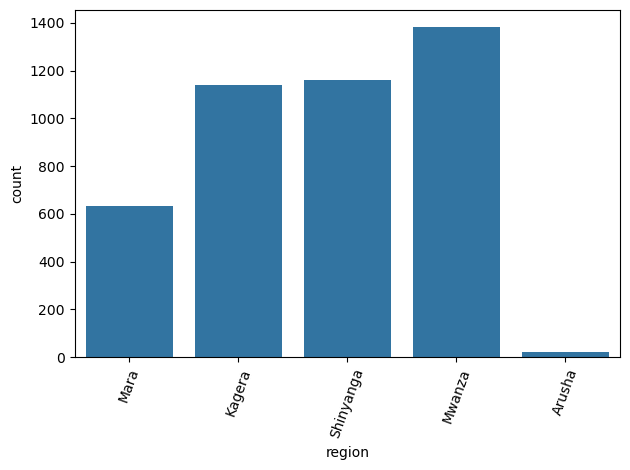

In [27]:
func = fdf[fdf['target'] == 'functional']
sns.countplot(data=func, x='region')
plt.xticks(rotation=70)
plt.tight_layout();

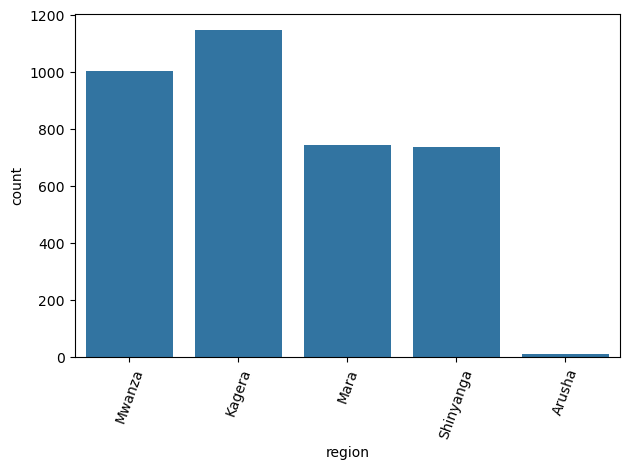

In [28]:
nonfunc = fdf[fdf['target'] == 'non functional']
sns.countplot(data=nonfunc, x='region')

plt.xticks(rotation=70)
plt.tight_layout();

In [29]:
fdf['lga'].value_counts()
# stands for Local Government Authorities (LGAs) in Tanzania are accountable for the delivery of public services to citizens - 
# providing oversight and management support to health facilities, schools, and villages.

lga
Bariadi            1078
Karagwe             695
Magu                597
Kwimba              564
Ngara               463
Maswa               449
Musoma Rural        367
Geita               350
Bukoba Rural        348
Serengeti           342
Bunda               321
Sengerema           294
Missungwi           255
Muleba              232
Chato               210
Ukerewe             209
Misenyi             206
Rorya               192
Tarime              159
Shinyanga Rural     146
Meatu               137
Ilemela             119
Kahama               80
Biharamulo           77
Bukoba Urban         58
Ngorongoro           32
Kishapu               6
Nyamagana             1
Name: count, dtype: int64